# Predicting Flight Delays with Neural Networks

by Sam Watson

## Objective
To create a deep learning regression model that accurately predicts the delay time of aircraft arrivals.

First, we will explore how the model performs after training and testing on the data  itself. <br>
Then, we will compare the results to the model trained on a generator that randomly loads samples from the DataFrame, and again on a generator that augments the data by adding noise.

## Importing the Data
For this analysis, I'm combining two datasets: one for flights, and one for weather information. (**Appendix, fig. 2**)

### About the Data

The flight data is retrieved from the United States Department of Transportation. The website holds all airline data reported to the U.S Department of Transportation (DOT) from the top 12 U.S air carriers. Each of these air carriers has at least 1% of the total domestic scheduled-service passenger revenue. <br>

From DOT's website (link here: https://transtats.bts.gov/ONTIME/), I've exported 12 CSV files containing flight data, one for each month in the year of 2018. There are 41 features, and 7,213,446 samples.

In [51]:
print('shape of flights data:',df.shape,'. Columns:')

shape of flights data: (7213446, 41) . Columns:


The weather dataset came from the National Oceanic and Atmospheric Administration's (NOAA) National Centers for Environmental Information (NCEI). Say that 10 times fast. NCEI holds and provides access to historical weather information, such as oceanic, atmospheric, and geophysical data. 

From their website (https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND), I exported daily temperature, percipitation, and snowfall (inches) for each weather station in New York City, New York for 2018. 

## Preprocessing of the Data
The flight dataset has over 7 million records, and spans accross 352 different cities. I've filtered the dataset to just flight arrivals in New York city (NYC). There are two airports in NYC: Laguardia, and JFK.

Conveniently so, there are weather stations at both Laguardia and JFK. The weather data is then filtered by just these two stations, and reduced to only the columns for percipitation (PRCP), snow (SNOW), and average tempurature (TAVG). (**Appendix, fig. 3**)

In [53]:
print(weather.groupby('DEST').count())

      FL_DATE  PRCP  SNOW  TAVG
DEST                           
JFK       365   365   365   365
LGA       365   365   365   365


Next, I turned the OP_CARRIER (what flight carrier) column into dummy variables, split the date column into the day of the week, the month of the year, and the day of the month. (**Appendix, fig. 4**)

Then, I separated the date columns into a day of the week, day of the month, and month of the year columns. (**Appendix, fig. 5**)

Finally, before normalizing the data, I combined the weather and flights dataset, changed LGA/JFG to a binary column, and shortened the listing of columns. <br>
<br>
If a flight is canceled, then the delay and the airtime columns are NaN values. I decided to drop canceled flights from my dataset. At first, I tried filling NaN values with 0. The logic behind this is that if a flight is canceled, there is no delay, because the plane never took off. But in the end, it was simpler having them removed. Below shows the shapes of the data, the feature names, and the shape of the target value (flight arrival delay in minutes) (**Appendix, fig. 6**)

In [13]:
print('shape of data (X)',X.shape)
print('')
print('features of the data (X)',X.columns)
print('')
print('shape of target (y)',y.shape)

shape of data (X) (287618, 27)

features of the data (X) Index(['day_of_week', 'day_of_month', 'month_of_year', 'PRCP', 'SNOW', 'TAVG',
       'DISTANCE', 'DEST_NUM', 'DEP_DELAY', 'AIR_TIME', 'car_9E', 'car_AA',
       'car_AS', 'car_B6', 'car_DL', 'car_EV', 'car_F9', 'car_HA', 'car_MQ',
       'car_NK', 'car_OH', 'car_OO', 'car_UA', 'car_VX', 'car_WN', 'car_YV',
       'car_YX'],
      dtype='object')

shape of target (y) (287618, 1)


## Creating a Model

First, the data is split into training and testing subsets. (**Appendix, fig. 7**)

Next, we create the model, which will be sequential. Because the output is linear, the activation function on the last layer will have to be one neuron, with an activation function='linear.' The appropriate losses and/or metrics to use for regression problems similar to this are either mean average error (mae), or mean squared error (mse). (**Appendix, fig. 8**)

See below summary of the model

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1400      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 7,541
Trainable params: 7,541
Non-trainable params: 0
_________________________________________________________________


### Training the Model

Below is the model being trained over 7 epochs with a batch size of 1000 using the model.fit() command. <br>
<br>
My model performed the best with the above hyper paramenters. Changing the activation function from relu to prerelu or leakyrelu, and adjusting my loss to MSE instead of MAE did not change the model's performance by much. The model did train better, however, after setting my learning rate/decay rate instead of using the default one. Adding layers with a large amount of neurons didn't help, and if anything hurt the performance. <br> 
The model's structure felt like the right sweet spot between simplicity and effectivity.

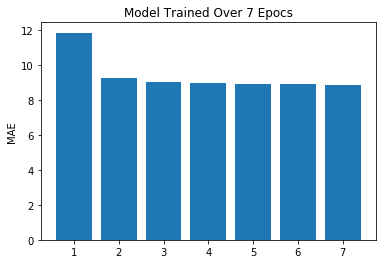

In [41]:
epoc=['1','2','3','4','5','6','7']
h1=history.history['loss']
plt.bar(epoc,h1)
plt.title('Model Trained Over 7 Epocs')
plt.ylabel('MAE')
plt.show()

With one input layer, one output layer, and three hidden layers, the model performs quite well. The test data's MAE and MSE isn't too far off the training's. The MAE is 8.9, which means on average the predicted delay time is off by 8.9 minutes. <br>
Below is the evaluation of the model on the test data, along with a scatter plot showing the actual vs the predicted arrival delay time for the flights. (**Appendix, fig. 9**)

In [26]:
print('Evaluation loss on test data (MAE):',first[0])

Evaluation loss on test data (MAE): 8.864149572355062


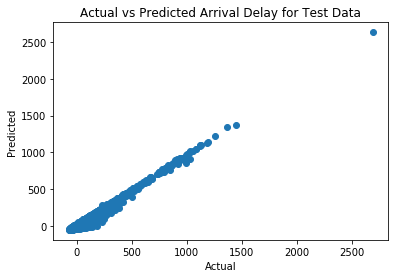

In [29]:
plt.scatter(y_test,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Arrival Delay for Test Data')
plt.show()

## Training Using Generators

Now lets train the model again, but this time with generators!

My beautiful generator (who was much harder to create than advertised), and proof that it works. Its generating a sample at a time. (**Appendix, fig. 10**)

In [25]:
mygen=gen()
next(mygen)

(array([[-0.94084736,  0.1265741 ,  0.11475837,  4.40170568, -0.10344498,
          1.46793086,  0.62206598, -0.87663279,  0.94212908,  1.1040362 ,
         -0.44565952,  2.5629422 , -0.11905858, -0.44667908, -0.47558993,
         -0.14495419, -0.06047342, -0.03559729, -0.26305842, -0.11699927,
         -0.08692625, -0.1782384 , -0.17890181, -0.05900805, -0.19807173,
         -0.07051324, -0.36614126]]), array([83.]))

I training the model with my generator (**Appendix, fig. 11**). See below epoc summary, as well as the evaluation loss.

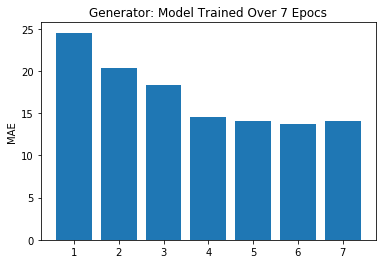

In [56]:
h2=history2.history['loss']
plt.bar(epoc,h2)
plt.title('Generator: Model Trained Over 7 Epocs')
plt.ylabel('MAE')
plt.show()

In [31]:
print('Evaluation loss on test data (MAE) for generator:',second[0])

Evaluation loss on test data (MAE) for generator: 13.712509193271865


The model performed worse on the test data after training with a generator, but not by much. It also took longer to lower the MAE with the generator. <br>
Below I created another generator, but this time, the data is augmented by adding random noise. (**Appendix, fig. 10**)

Proof that my new generator works, and augments the data

In [32]:
myaug=aug()
next(myaug)

(array([[ 1.12748449e+00,  2.50773312e+00,  1.36312823e+00,
         -3.40268092e-01,  3.26572766e-02,  9.31925172e+00,
          6.58626225e+02, -5.57062929e-01,  3.94830170e+01,
          1.13188576e+01, -2.13458228e-01, -3.83484392e-01,
         -7.89503097e-02, -1.00052582e-01, -3.31605246e-01,
         -5.60196907e-03, -1.92569952e-02, -1.01590458e-02,
         -2.33925776e-01, -1.08594122e-01, -1.10762043e-02,
         -3.63703097e-02, -2.62760685e-02, -1.29517845e-02,
         -1.64590986e-01, -3.86885898e-02,  2.82277338e+00]]), array([-12.]))

The model was trained one last time; this time on the augmented data generator. (**Appendix, fig. 12**). See below epoc summary, as well as the evaluation loss.

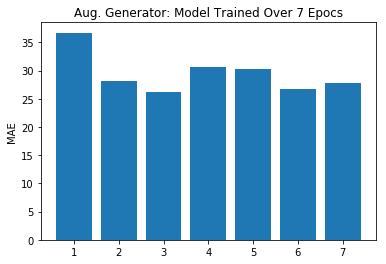

In [55]:
h3=history3.history['loss']
plt.bar(epoc,h3)
plt.title('Aug. Generator: Model Trained Over 7 Epocs')
plt.ylabel('MAE')
plt.show()

In [34]:
print('Evaluation loss on test data (MAE) for generator:',third[0])

Evaluation loss on test data (MAE) for generator: 27.527805431555098


The model performed significantly worse with the augmented data.

## Conclusion

The objective of this project was to create a neural network that predicts the arrival delay of a flight into NYC. The data is a combination of weather and flights data from the government. A model was created with one input layer, one output layer, and three hidden layers. The model was trained three times; once on the training data itself, once with a data generator, and once with augmented data.

The model perfomed the best with just the training data, and performed the worst with augmented data from a generator. In general, the purpose of a generator and data augmentation is to make the model more robust due to limited data. 

Below is a summary of the performance of the three trained models. Again, the model performed the best when not using a generator.

In this project, there is a surplus of flights data. In a "real world" simulation of this, we really wouldn't need to augment the data. A practical application of a generator for this type of problem, though, would be to load the data from a saved file, as the datasets can get very large.

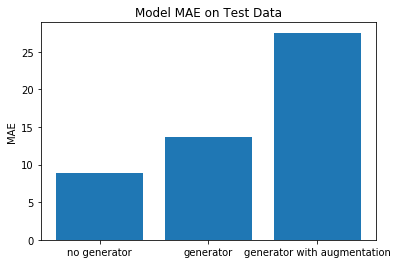

In [50]:
x1=['no generator','generator','generator with augmentation']
h=[first[0],second[0],third[0]]
plt.bar(x1,h)
plt.title('Model MAE on Test Data')
plt.ylabel('MAE')
plt.show()

## Appendex

#### fig. 1
Importing librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
#import keras

#### fig. 2
Loading the data

In [2]:
#loading the data
df1= pd.read_csv('2018.01.csv')
df2= pd.read_csv('2018.02.csv')
df3= pd.read_csv('2018.03.csv')
df4= pd.read_csv('2018.04.csv')
df5= pd.read_csv('2018.05.csv')
df6= pd.read_csv('2018.06.csv')
df7= pd.read_csv('2018.07.csv')
df8= pd.read_csv('2018.08.csv')
df9= pd.read_csv('2018.09.csv')
df10= pd.read_csv('2018.10.csv')
df11= pd.read_csv('2018.11.csv')
df12= pd.read_csv('2018.12.csv')

In [3]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index=True)
import warnings
warnings.filterwarnings("ignore")
weather=pd.read_csv('NYC_weather.csv')

#### fig. 3
Filtering the flights and weather dataset by just NYC JFK/LGA

In [4]:
#filtering the flights dataset by just NYC
flights=df[df.DEST_CITY_NAME=='New York, NY']
flights.groupby('DEST').size()

DEST
JFK    129684
LGA    171082
dtype: int64

In [5]:
#filtering the weather dataset by jmust JFK and LGA
weather=pd.read_csv('NYC_weather.csv')
weather=weather[(weather.NAME=='LAGUARDIA AIRPORT, NY US') | (weather.NAME=='JFK INTERNATIONAL AIRPORT, NY US')]
weather=weather[['DATE','NAME','PRCP','SNOW','TAVG']]
weather.loc[weather['NAME']=='LAGUARDIA AIRPORT, NY US','NAME']='LGA'
weather.loc[weather['NAME']=='JFK INTERNATIONAL AIRPORT, NY US','NAME']='JFK'

#### fig. 4
Changing the carrier column into dummy variables to feed into the network

In [6]:
#changing the carrier into dummy variables
carrier=flights['OP_CARRIER']
carrier=pd.get_dummies(carrier,prefix='car')
carrier.head()

,car_9E,car_AA,car_AS,car_B6,car_DL,car_EV,car_F9,car_HA,car_MQ,car_NK,car_OH,car_OO,car_UA,car_VX,car_WN,car_YV,car_YX
124,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
283,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
341,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
368,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### fig. 5
Changing the date column into  usable format for the network.

In [8]:
flights['FL_DATE']=flights['FL_DATE'].apply(pd.to_datetime)
flights['day_of_week']=flights['FL_DATE'].dt.dayofweek
flights['day_of_month']=flights['FL_DATE'].dt.day
flights['month_of_year']=flights['FL_DATE'].dt.month

#### fig. 6
Preparing the data features and target to be used for the network.

In [9]:
print('start:',flights.shape)
flights2=pd.merge(carrier,flights, left_index=True,right_index=True)
print('join carrier:',flights2.shape)
col=list(weather.columns)
col[0]='FL_DATE'
col[1]='DEST'
weather.columns=col
weather['FL_DATE']=weather['FL_DATE'].apply(pd.to_datetime)
data=pd.merge(flights2,weather, on=['FL_DATE','DEST'])
print('join weather:',data.shape)

start: (300766, 44)
join carrier: (300766, 61)
join weather: (300766, 64)


In [10]:
#removing canceled flights, getting only necessary columns, and changing Dest to a Binary column
data.loc[data['DEST']=='LGA','DEST_NUM']=0
data.loc[data['DEST']=='JFK','DEST_NUM']=1
data=data[['day_of_week','day_of_month','month_of_year','PRCP', 'SNOW', 'TAVG','DISTANCE','DEST_NUM',
           #'CANCELLED',
'DEP_DELAY','AIR_TIME',
'car_9E','car_AA','car_AS','car_B6','car_DL','car_EV','car_F9','car_HA','car_MQ',
'car_NK','car_OH','car_OO','car_UA','car_VX','car_WN','car_YV','car_YX',
'ARR_DELAY']]
data=data.dropna()
#data=data.fillna(0)
#export_csv = data.to_csv (r'C:\Users\wamsa\Desktop\FLIGHTS.csv', index = None, header=True) 

In [11]:
y=data[['ARR_DELAY']]
X=data[['day_of_week','day_of_month','month_of_year','PRCP', 'SNOW', 'TAVG','DISTANCE','DEST_NUM',
#'CANCELLED',
'DEP_DELAY','AIR_TIME',
'car_9E','car_AA','car_AS','car_B6','car_DL','car_EV','car_F9','car_HA','car_MQ',
'car_NK','car_OH','car_OO','car_UA','car_VX','car_WN','car_YV','car_YX']]

In [14]:
import sklearn
from sklearn import preprocessing
#X=preprocessing.normalize(data)
y=np.ravel(y.values)
print('shape of data (X)',X.shape)
print('shape of target (y)',y.shape)

shape of data (X) (287618, 27)
shape of target (y) (287618,)


#### fig. 7
Normalizing the data

In [15]:
from sklearn.model_selection import train_test_split
mean=X.mean(axis=0)
X -=mean
std= X.std(axis=0)
X /= std
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2,random_state=42)

#### fig. 8
Creating the model

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

model=models.Sequential()

model.add(layers.Dense(50,
                       activation='relu',
                       input_shape=(27,)))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(1,activation='linear'))

model.compile(optimizer=optimizers.Adam(lr=.01,decay=1e-6),
             loss='mae',
             metrics=['mse','mae'])

model.summary()

Using TensorFlow backend.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1400      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 7,541
Trainable params: 7,541
Non-trainable params: 0
_________________________________________________________________


#### fig. 9
Training the model (no generator)

In [28]:
history=model.fit(X_train, y_train, epochs=7,batch_size=1000)
first=model.evaluate(X_test,y_test)
pred=model.predict(X_test)
pred=np.ravel(pred)

Epoch 1/7
230094/230094 [==============================] - 1s 4us/step - loss: 11.8522 - mean_squared_error: 558.2309 - mean_absolute_error: 11.8522
Epoch 2/7
230094/230094 [==============================] - 1s 4us/step - loss: 9.2396 - mean_squared_error: 187.0399 - mean_absolute_error: 9.2396
Epoch 3/7
230094/230094 [==============================] - 1s 3us/step - loss: 9.0493 - mean_squared_error: 181.5868 - mean_absolute_error: 9.0493
Epoch 4/7
230094/230094 [==============================] - 1s 3us/step - loss: 8.9833 - mean_squared_error: 179.5691 - mean_absolute_error: 8.9833
Epoch 5/7
230094/230094 [==============================] - 1s 3us/step - loss: 8.9402 - mean_squared_error: 177.8991 - mean_absolute_error: 8.9402
Epoch 6/7
230094/230094 [==============================] - 1s 3us/step - loss: 8.9050 - mean_squared_error: 177.0981 - mean_absolute_error: 8.9050
Epoch 7/7
57524/57524 [==============================] - 1s 14us/step


#### fig. 10
My python generators

In [18]:
working=data[['day_of_week','day_of_month','month_of_year','PRCP', 'SNOW', 'TAVG','DISTANCE','DEST_NUM',
        'DEP_DELAY','AIR_TIME',
        'car_9E','car_AA','car_AS','car_B6','car_DL','car_EV','car_F9','car_HA','car_MQ',
        'car_NK','car_OH','car_OO','car_UA','car_VX','car_WN','car_YV','car_YX']]
mean=working.mean(axis=0)
std= working.std(axis=0)

In [19]:
def gen():   
    while True:
        s=data.sample()
        sy=s[['ARR_DELAY']]
        s=s[['day_of_week','day_of_month','month_of_year','PRCP', 'SNOW', 'TAVG','DISTANCE','DEST_NUM',
        'DEP_DELAY','AIR_TIME',
        'car_9E','car_AA','car_AS','car_B6','car_DL','car_EV','car_F9','car_HA','car_MQ',
        'car_NK','car_OH','car_OO','car_UA','car_VX','car_WN','car_YV','car_YX']]
        s=s-mean
        s=s/std
        myy=np.ravel(sy.values)
        myx=s.values.reshape(1,27)
        myx=np.asarray(myx)
        yield myx,myy

In [20]:
def aug():   
    while True:
        s=data.sample()
        sy=s[['ARR_DELAY']]
        s=s[['day_of_week','day_of_month','month_of_year','PRCP', 'SNOW', 'TAVG','DISTANCE','DEST_NUM',
        'DEP_DELAY','AIR_TIME',
        'car_9E','car_AA','car_AS','car_B6','car_DL','car_EV','car_F9','car_HA','car_MQ',
        'car_NK','car_OH','car_OO','car_UA','car_VX','car_WN','car_YV','car_YX']]
        s=s-mean
        s=s/std
        #adding random noise to the generated sample
        q=pd.DataFrame(np.random.random(s.shape),columns=s.columns,index=s.index)
        s=s+std*q
        myy=np.ravel(sy.values)
        myx=s.values.reshape(1,27)
        myx=np.asarray(myx)
        yield myx,myy

#### fig. 11
Training the model on a generator

In [22]:
mygen=gen()
history2=model.fit_generator(mygen,steps_per_epoch=1000,epochs=7)
second=model.evaluate(X_test,y_test)

Epoch 1/7
1000/1000 [==============================] - 16s 16ms/step - loss: 24.5343 - mean_squared_error: 2256.9979 - mean_absolute_error: 24.5343
Epoch 2/7
1000/1000 [==============================] - 15s 15ms/step - loss: 20.3471 - mean_squared_error: 1553.8316 - mean_absolute_error: 20.3471
Epoch 3/7
1000/1000 [==============================] - 15s 15ms/step - loss: 18.3202 - mean_squared_error: 1238.4650 - mean_absolute_error: 18.3202 2s - loss: 19.0134 - mean_squared_error
Epoch 4/7
1000/1000 [==============================] - 15s 15ms/step - loss: 14.4945 - mean_squared_error: 642.0106 - mean_absolute_error: 14.4945
Epoch 5/7
1000/1000 [==============================] - 15s 15ms/step - loss: 14.0375 - mean_squared_error: 444.6682 - mean_absolute_error: 14.0375 ETA: 1s - loss:
Epoch 6/7
1000/1000 [==============================] - 15s 15ms/step - loss: 13.6989 - mean_squared_error: 401.6833 - mean_absolute_error: 13.6989
Epoch 7/7
57524/57524 [==============================] - 1s

#### fig. 12
Training the model on the generator that augments the data by adding noise

In [23]:
myaug=aug()
history3=model.fit_generator(myaug,steps_per_epoch=1000,epochs=7)
third=model.evaluate(X_test,y_test)

Epoch 1/7
1000/1000 [==============================] - 16s 16ms/step - loss: 36.7246 - mean_squared_error: 19378.7642 - mean_absolute_error: 36.72460s - loss: 37.4127 - mean_squared_error: 20038.6124 - mean_abs
Epoch 2/7
1000/1000 [==============================] - 16s 16ms/step - loss: 28.0978 - mean_squared_error: 2954.5936 - mean_absolute_error: 28.0978 3s - loss: 28.605
Epoch 3/7
1000/1000 [==============================] - 15s 15ms/step - loss: 26.1296 - mean_squared_error: 3315.4501 - mean_absolute_error: 26.1296 1s - loss: 25.5789 - mean_squared_error: 3214.4427 - mean_absolute_error: 25 - ETA: 1s - loss: 25.5468 - mean_squared_error: 3183.4229 - mean
Epoch 4/7
1000/1000 [==============================] - 16s 16ms/step - loss: 30.6205 - mean_squared_error: 5532.4367 - mean_absolute_error: 30.6205
Epoch 5/7
1000/1000 [==============================] - 16s 16ms/step - loss: 30.2691 - mean_squared_error: 3967.8477 - mean_absolute_error: 30.2691
Epoch 6/7
1000/1000 [================